# Titanic Survival Prediction

**Author:** Tan Shi Wei  
**Date:** 01/09/2025  
**Dataset Source:** [Kaggle – Titanic Dataset](https://www.kaggle.com/datasets/yasserh/titanic-dataset/data)

## 1️⃣ Project Overview

This notebook tackles a binary classification problem: predicting passenger survival on the Titanic. 

The goal is to perform exploratory data analysis (EDA), preprocess the data, and implement logistic regression using scikit-learn to identify the factors that influenced survival, offering insights into the social, economic, and demographic dynamics of the time.

**Objectives:**
- Explore key features that influence survival (e.g., age, fare, class, gender).
- Handle missing values and encode categorical data.
- Build and evaluate a logistic regression model.
- Interpret model performance and feature importance.

## 2️⃣ About the Dataset

The Titanic dataset contains information about passengers on board, including demographic and travel details.

**Key Details:**
- **Number of Instances:** ~891 training samples
- **Features include:** `PassengerId`, `Pclass`, `Name`, `Sex`, `Age`, `SibSp`, `Parch`, `Ticket`, `Fare`, `Cabin`, `Embarked`
- **Target variable:** Survived (0 = No, 1 = Yes)
- **Missing Values:** Present in Age, Cabin, and Embarked

| **Variable**   | **Description**                                                                 |
|----------------|---------------------------------------------------------------------------------|
| `PassengerId`  | Unique identifier for each passenger record.                                    |
| `Survived`     | Survival status (0 = No, 1 = Yes).                                              |
| `Pclass`       | Ticket class: 1st, 2nd, or 3rd class. Representative of socio-economic status.  |
| `Name`         | Passenger's full name.                                                          |
| `Sex`          | Gender of the passenger.                                                        |
| `Age`          | Age in years.                                                                   |
| `SibSp`        | Number of siblings and/or spouses aboard the Titanic.                           |
| `Parch`        | Number of parents and/or children aboard the Titanic.                           |
| `Ticket`       | Ticket number.                                                                  |
| `Fare`         | Fare paid for the ticket (in British pounds).                                   |
| `Cabin`        | Cabin number.                                                                   |
| `Embarked`     | Port of embarkation: C = Cherbourg, Q = Queenstown, S = Southampton.            |

## 3️⃣ Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.metrics import classification_report, confusion_matrix

## 4️⃣ Load dataset

In [2]:
df = pd.read_csv('data/titanic_dataset.csv')

## 5️⃣ Exploratory Data Analysis (EDA)

### 5.1 Dataset Overview

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


Several columns contain missing values, most notably `Age`, `Cabin`, and `Embarked`.

### 5.2 Survival by Gender and Class

<Axes: xlabel='Sex', ylabel='Survived'>

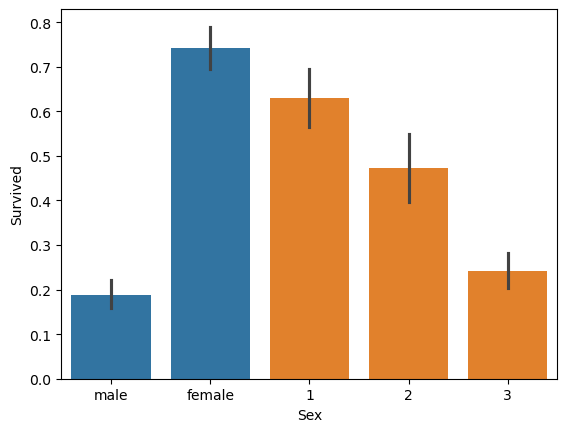

In [4]:
sns.barplot(x='Sex', y='Survived', data=df)
sns.barplot(x='Pclass', y='Survived', data=df)

The bar plots indicate that female passengers and those holding 1st-class tickets were more likely to survive compared to male passengers and those in 2nd or 3rd class.

### 5.3 Age vs Survival Boxplot

<Axes: xlabel='Survived', ylabel='Age'>

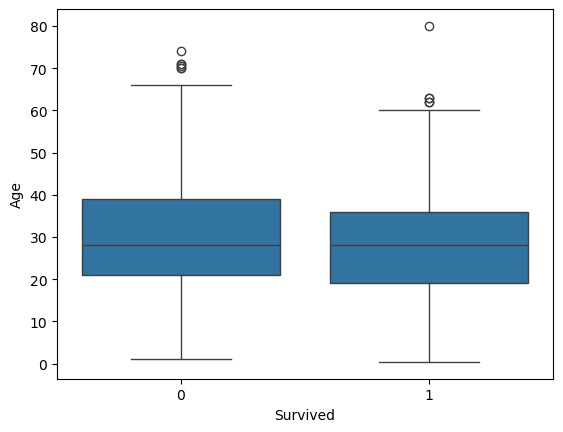

In [5]:
sns.boxplot(x='Survived', y='Age', data=df)

In the boxplot comparing survivors and non-survivors, non-survivors (0) tended to have slightly older ages at the lower end of the distribution and a wider overall spread, while survivors (1) had fewer but more widely spread outliers compared to the more clustered outliers among non-survivors.

### 5.4 Correlation Heatmap

<Axes: >

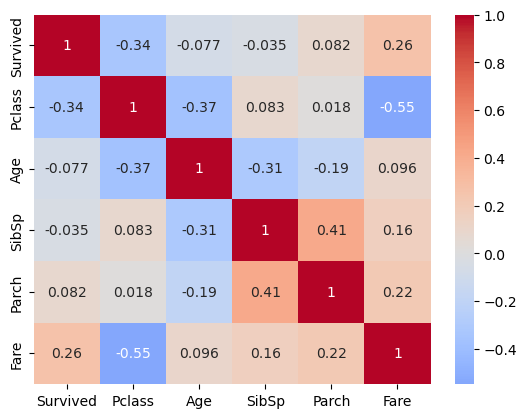

In [6]:
corr = df[['Survived', 'Pclass', 'Age', 'SibSp', 'Parch', 'Fare']].corr()
sns.heatmap(corr, annot=True, cmap='coolwarm', center=0)

During the correlation analysis, the correlation matrix did not reveal any particularly strong relationships between the variables in this Titanic dataset. No pairs of features showed correlations high enough to suggest redundancy or strong linear association. This indicates that the dataset’s features are largely independent, and each may contribute unique information when building a bianry logistic regression model for predicting survival.

## 6️⃣ Preprocessing

In [7]:
# Handle missing values by removing rows with NaN in 'Age' or 'Embarked'
df = df.dropna(subset=['Age', 'Embarked'])

# Drop non-informative columns
df.drop(['PassengerId', 'Name', 'Ticket', 'Cabin'], axis=1, inplace=True)

# Encode categorical features
df = pd.get_dummies(df, columns=['Sex', 'Embarked'], drop_first=True)

# Split features and labels
X = df.drop('Survived', axis=1).values
y = df['Survived'].values

# Standardize features
scaler = StandardScaler()
X = scaler.fit_transform(X)

# Train-test split with stratification
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

## 7️⃣ Modeling - Binary Logistic Regression

In [8]:
model = LogisticRegression(max_iter=500)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

## 8️⃣ Evaluation

              precision    recall  f1-score   support

           0       0.82      0.85      0.83        85
           1       0.76      0.72      0.74        58

    accuracy                           0.80       143
   macro avg       0.79      0.79      0.79       143
weighted avg       0.80      0.80      0.80       143



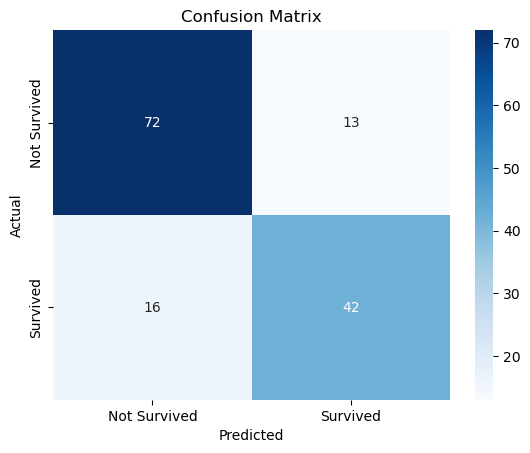

In [9]:
print(classification_report(y_test, y_pred))
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Not Survived','Survived'],
            yticklabels=['Not Survived','Survived'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

## 9️⃣ Conclusion

The binary logistic regression model achieved an overall accuracy of 80% on the test set, indicating good predictive performance for the Titanic dataset.

- Non-survivors (0) were predicted slightly more accurately than survivors (1), with higher precision (0.82 vs. 0.76) and recall (0.85 vs. 0.72).

- The F1-scores reflect a balanced performance, though the model is somewhat better at identifying non-survivors than survivors.

Overall, the results suggest that the selected features provided useful information for predicting survival, but there may still be room to improve recall for survivors, for example through feature engineering or more advanced models.